# Filtering the Pancealab Twitter Dataset

The dataset available on the Pancealab [github repo](https://github.com/thepanacealab/covid19_twitter) is very large
and analysing it in its entirety would be expensive, lengthy and out of scope for the project. Instead using this notebook,
we can filter the files by selecting a number of tweets and a number of languages. It was decided that 1000 from 6 languages
would suffice for this part of the project.

English and Spanish are considered global languages, to balance this out French, German, Dutch and Italian tweets are included
as well as they are more spoken more in the European continent then on anywhere else on the globe.

In [1]:
import pandas as pd
from tqdm.notebook import tqdm
import os
import sys
import importlib
import matplotlib.pyplot as plt
from multiplex import drawable

drawable = importlib.reload(drawable)
# reload the style
plt.style.use(os.path.join(sys.path[0], 'styles', "multiplex.style"))

valid_languages = ['en', 'es', 'fr', 'de' , 'nl', 'it']

root = 'Data/pancealab/'
if not os.access(root, os.R_OK):
    print("Check dataroot!!")


def pie(data, labelname, figname):
    figure = plt.figure(figsize=(5, 5))
    viz = drawable.Drawable(figure)
    temp = data[labelname].value_counts()
    df = pd.DataFrame({'labels': [str(temp.values.tolist()[i]) + ' ' + l for i, l in enumerate(temp.index)],
                       'values': temp.values
                       })

    labels = df['labels']
    sizes = df['values']
    patches, texts = viz.pie(sizes, shadow=True, startangle=90, pctdistance=1.1, labeldistance=1.2)
    plt.legend(patches, labels, loc="right")
    viz.axis('equal')
    viz.set_title(figname, loc='left')
    viz.savefig(fname='Output/'+figname,dpi=300, bbox_inches='tight')

In this cell we go over the files in the Data/pancealab/ folder and extract 1000 tweets for each language chosen.

Since the method used below has already proven to result in equal distribution of 1000 tweets per language per day, there
is no need to visualize the data in any form, since this would just create clutter and useless information.

  0%|          | 0/6 [00:00<?, ?it/s]

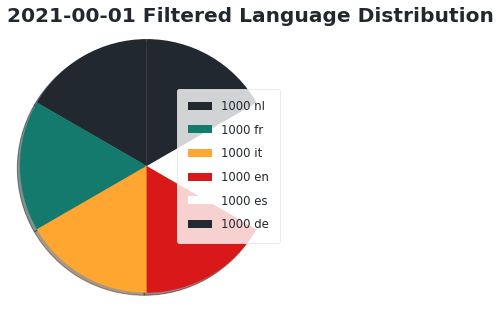

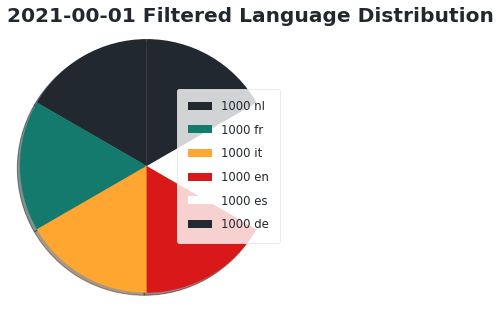

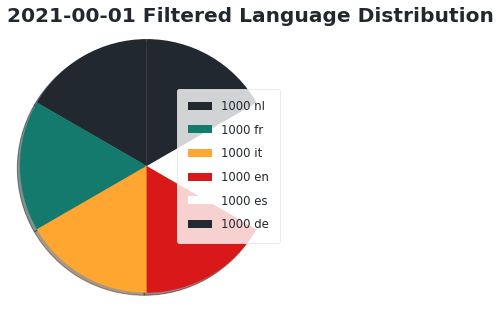

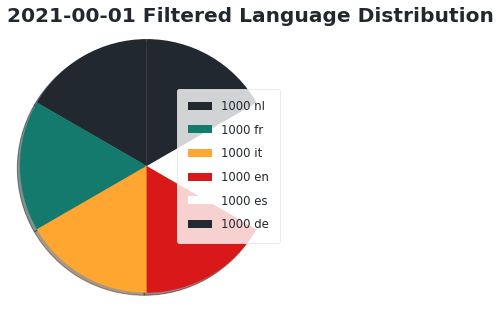

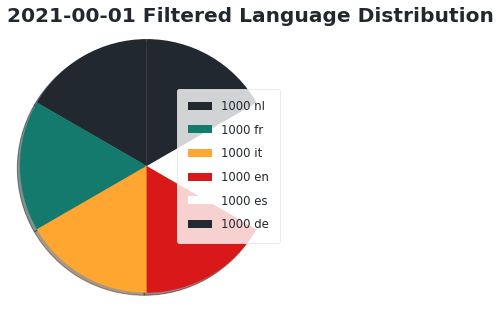

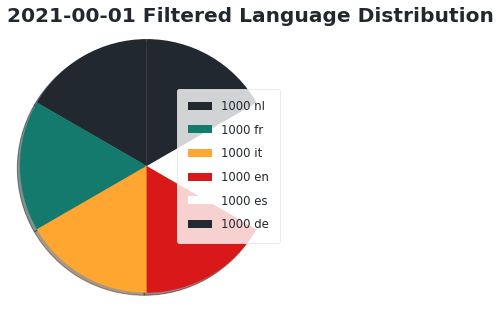

In [2]:
for month in tqdm(os.listdir(root)):
    monthPath = os.path.join(root, month)
    for i, file in enumerate(os.listdir(monthPath)):
        file_path = os.path.join(monthPath, file)
        data = pd.read_csv(file_path, sep='\t')
        v_counts = data['lang'].value_counts()
        valid_data = pd.DataFrame(columns=data.columns)
        lang_indices = {}
        # add each index to its label
        languages = data["lang"]
        for j, lang in enumerate(languages):
            if lang in valid_languages:
                if lang not in lang_indices:
                    lang_indices[lang] = []
                lang_indices[lang].append(j)
        for lang in valid_languages:
            valid_data = valid_data.append(data.iloc[lang_indices[lang][:1000]])
        valid_data.to_json('Data/FilteredTwitterIDs/' + month + str(i) + '.json')